In [1]:
import pandas as pd

df = pd.read_csv(r'E:\carr\btech cse\Semester 5\cohort summer school\fake news project\Fake_Real_Data.csv')
display(df.head())


,Text,label
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake
1,U.S. conservative leader optimistic of common ...,Real
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real
3,Court Forces Ohio To Allow Millions Of Illega...,Fake
4,Democrats say Trump agrees to work on immigrat...,Real


In [2]:
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer


nltk.download('stopwords')
nltk.download('punkt')


df['Text'] = df['Text'].fillna('')


def preprocess_text(text):

    text = text.lower()

    text = re.sub(r'[^a-z\s]', '', text)

    tokens = text.split()

    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words]

    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens]

    return ' '.join(tokens)


df['Processed_Text'] = df['Text'].apply(preprocess_text)


display(df.head())

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\madhu\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


,Text,label,Processed_Text
0,Top Trump Surrogate BRUTALLY Stabs Him In The...,Fake,top trump surrog brutal stab back he pathet vi...
1,U.S. conservative leader optimistic of common ...,Real,us conserv leader optimist common ground healt...
2,"Trump proposes U.S. tax overhaul, stirs concer...",Real,trump propos us tax overhaul stir concern defi...
3,Court Forces Ohio To Allow Millions Of Illega...,Fake,court forc ohio allow million illeg purg voter...
4,Democrats say Trump agrees to work on immigrat...,Real,democrat say trump agre work immigr bill wall ...


In [3]:
from sklearn.feature_extraction.text import TfidfVectorizer


tfidf_vectorizer = TfidfVectorizer(max_features=5000)


tfidf_matrix = tfidf_vectorizer.fit_transform(df['Processed_Text'])


print("Shape of TF-IDF matrix:", tfidf_matrix.shape)

Shape of TF-IDF matrix: (9900, 5000)


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import PassiveAggressiveClassifier

X = tfidf_matrix
y = df['label']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

pac = PassiveAggressiveClassifier(max_iter=50) 

pac.fit(X_train, y_train)

print("PassiveAggressiveClassifier trained successfully.")

PassiveAggressiveClassifier trained successfully.


Training Accuracy: 1.0
Testing Accuracy: 0.9974747474747475


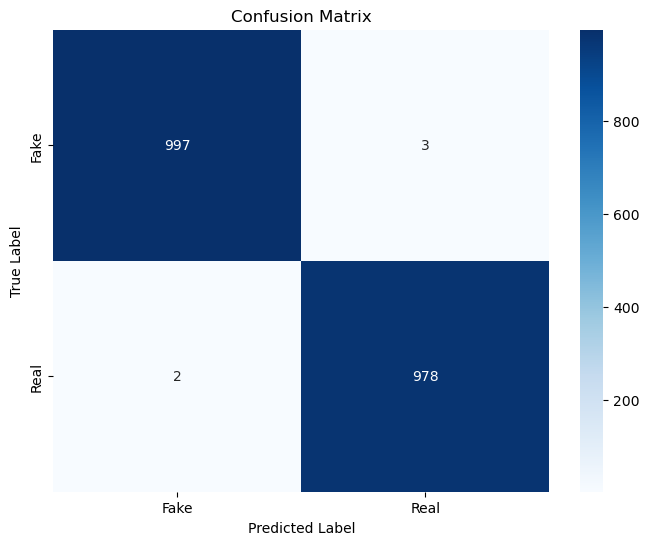


Classification Report:
              precision    recall  f1-score   support

        Fake       1.00      1.00      1.00      1000
        Real       1.00      1.00      1.00       980

    accuracy                           1.00      1980
   macro avg       1.00      1.00      1.00      1980
weighted avg       1.00      1.00      1.00      1980



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

y_train_pred = pac.predict(X_train)

y_test_pred = pac.predict(X_test)

train_accuracy = accuracy_score(y_train, y_train_pred)

test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy}")
print(f"Testing Accuracy: {test_accuracy}")

cm = confusion_matrix(y_test, y_test_pred)

plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=pac.classes_, yticklabels=pac.classes_)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, y_test_pred))

In [ ]:
import pickle

with open(r'E:\carr\btech cse\Semester 5\cohort summer school\fake news project\model.pkl', 'wb') as model_file:
    pickle.dump(pac, model_file)

with open(r'E:\carr\btech cse\Semester 5\cohort summer school\fake news project\vectorizer.pkl', 'wb') as vectorizer_file:
    pickle.dump(tfidf_vectorizer, vectorizer_file)

print("Model and vectorizer saved successfully.")

Model and vectorizer saved successfully.
